In [199]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px




In [200]:
diabetes = pd.read_csv('data/diabetes.csv')

Загрузите его к себе в ноутбук, охарактеризуйте имеющиеся колонки и число наблюдений. Проанализируйте, какие факторы связаны с развитием диабета, а какие нет.

In [201]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Pragnancies - беременность 
Glucose - уровень глюкозы крови; 
BloodPressure - артериальное давление; 
SkinThickness - величина кожной склакди;
Insulin - инсулин;
BMI - индекс массы тела;
DiabetesPedigreeFunction - отягощенный семейный анамнез;
Age - возраст;
Outcome- подтвержденный диагноз СД.

Всего 768 наблюдений


In [350]:
diabetes[diabetes['BloodPressure']==0]

,Pregnancies,glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,age,diabetes
7,10,115,0,0,0,35.3,0.134,29,0
15,7,100,0,0,0,30.0,0.484,32,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
78,0,131,0,0,0,43.2,0.270,26,1
81,2,74,0,0,0,0.0,0.102,22,0
172,2,87,0,23,0,28.9,0.773,25,0
193,11,135,0,0,0,52.3,0.578,40,1
222,7,119,0,0,0,25.2,0.209,37,0
261,3,141,0,0,0,30.0,0.761,27,1


<AxesSubplot: >

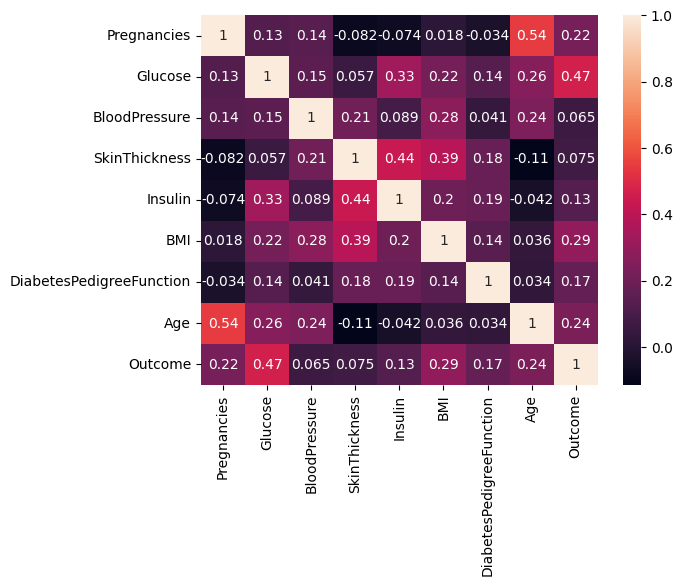

In [203]:
sns.heatmap(diabetes.corr(), annot= True)

С развитием диабета связан следующие признаки: Age, Glucose, Insulin, BMI, Pregnancies

In [204]:
colum =['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age','Outcome']

In [205]:
mask_diabet = diabetes['Outcome'] == 1
diabet_outcome = diabetes[mask_diabet]
diabet_outcome.sort_values(
    by = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
     'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'],
    ascending= True)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
109,0,95,85,25,36,37.4,0.247,24,1
448,0,104,64,37,64,33.6,0.510,22,1
129,0,105,84,0,0,27.9,0.741,62,1
291,0,107,62,30,74,36.6,0.757,25,1
66,0,109,88,30,0,32.5,0.855,38,1
...,...,...,...,...,...,...,...,...,...
691,13,158,114,0,0,42.3,0.257,44,1
298,14,100,78,25,184,36.6,0.412,46,1
455,14,175,62,30,0,33.6,0.212,38,1
88,15,136,70,32,110,37.1,0.153,43,1


<AxesSubplot: xlabel='Outcome', ylabel='BMI'>

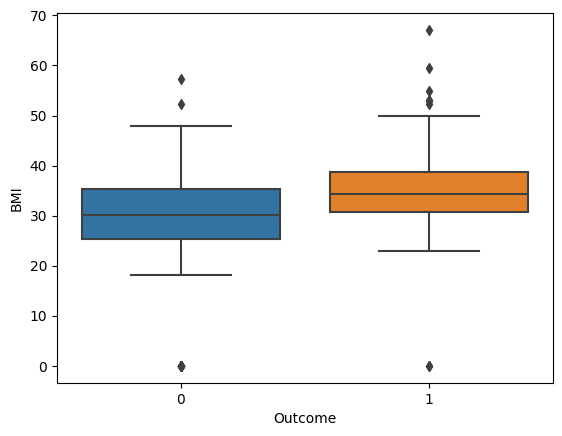

In [206]:
sns.boxplot(
    data=diabetes,
    x='Outcome',
    y= 'BMI'
)

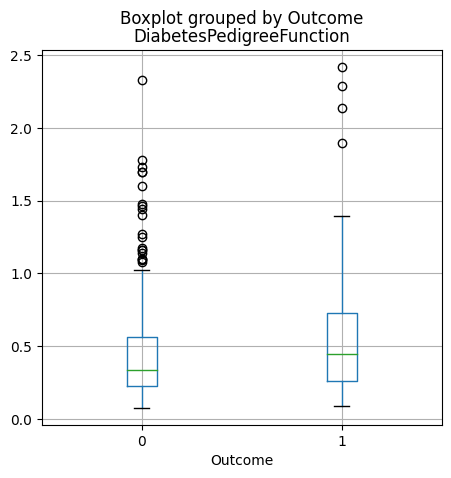

In [207]:
boxplot = diabetes.boxplot(
    column='DiabetesPedigreeFunction' , 
    by = 'Outcome',
    figsize=(5,5)
)

                    ВТОРОЙ ДАТАСЕТ
                    

In [208]:
train = pd.read_csv('data/train.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [209]:
test = pd.read_csv('data/test.csv')

In [210]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848 entries, 0 to 847
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               848 non-null    int64  
 1   age              848 non-null    int64  
 2   education        830 non-null    float64
 3   sex              848 non-null    object 
 4   is_smoking       848 non-null    object 
 5   cigsPerDay       841 non-null    float64
 6   BPMeds           839 non-null    float64
 7   prevalentStroke  848 non-null    int64  
 8   prevalentHyp     848 non-null    int64  
 9   diabetes         848 non-null    int64  
 10  totChol          836 non-null    float64
 11  sysBP            848 non-null    float64
 12  diaBP            848 non-null    float64
 13  BMI              843 non-null    float64
 14  heartRate        848 non-null    float64
 15  glucose          764 non-null    float64
dtypes: float64(9), int64(5), object(2)
memory usage: 106.1+ KB


In [211]:
cols_null_percent = train.isnull().mean() * 100
cols_with_null = cols_null_percent[
    cols_null_percent > 0
].sort_values(ascending=True)
cols_with_null

heartRate     0.029499
BMI           0.412979
cigsPerDay    0.648968
totChol       1.120944
BPMeds        1.297935
education     2.566372
glucose       8.967552
dtype: float64

In [212]:
train_copy = train.copy()
n = train_copy.shape[0] #число строк в таблице
thresh_usl = n*0.7
train_copy = train_copy.dropna(thresh=thresh_usl, axis=1)
m = train_copy.shape[1] #число признаков после удаления столбцов
train_copy = train_copy.dropna(thresh=m-2, axis=0)
train_copy.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3389 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3389 non-null   int64  
 1   age              3389 non-null   int64  
 2   education        3302 non-null   float64
 3   sex              3389 non-null   object 
 4   is_smoking       3389 non-null   object 
 5   cigsPerDay       3367 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3389 non-null   int64  
 8   prevalentHyp     3389 non-null   int64  
 9   diabetes         3389 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3389 non-null   float64
 12  diaBP            3389 non-null   float64
 13  BMI              3375 non-null   float64
 14  heartRate        3388 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3389 non-null   int64  
dtypes: float64(9),

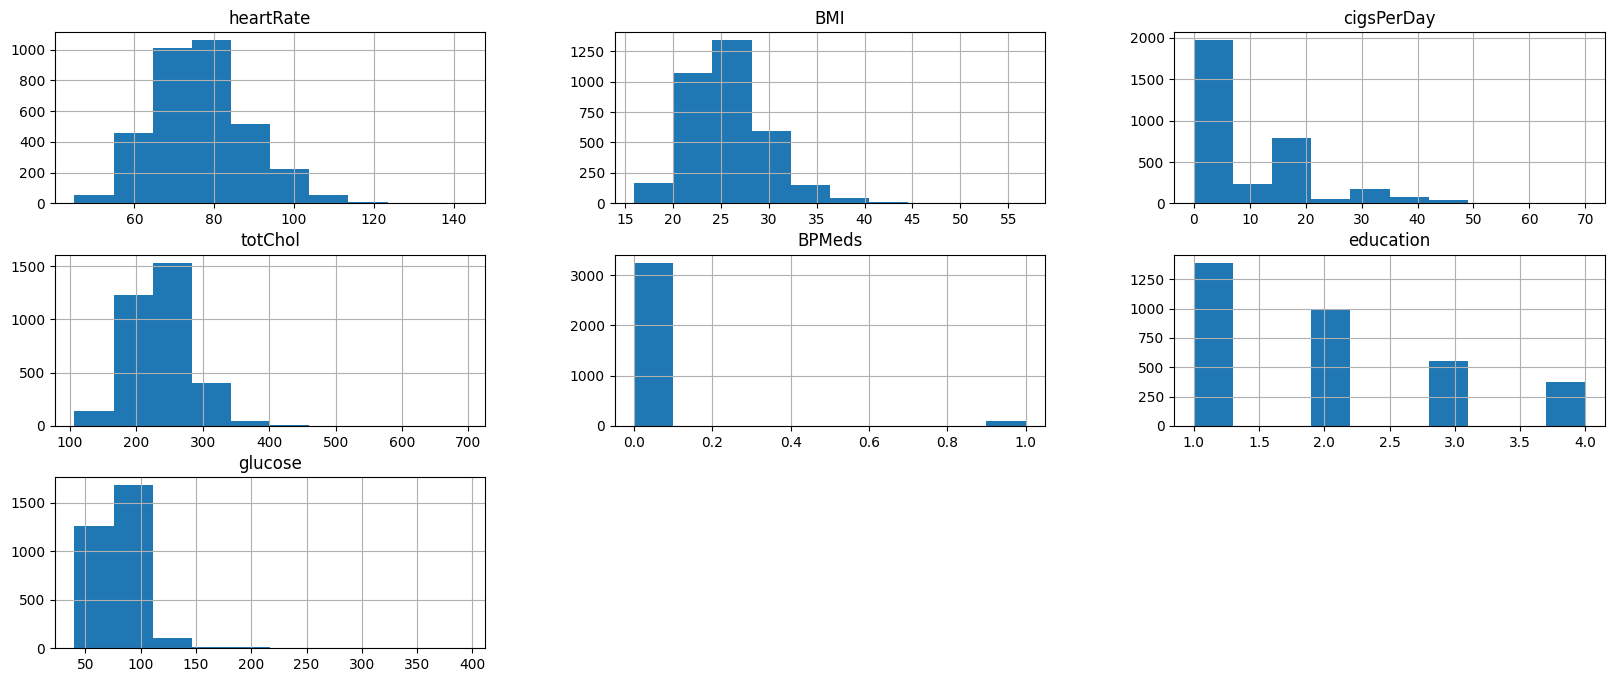

In [213]:
cols = cols_with_null.index
train_copy[cols].hist(figsize=(20, 8));

Судя по распределениям признаки Glucose, totChol, BMI - близки к логонармальным - их заполняем медианой!
Признаки heartRate, cigsPerDay, education - попробуем заполнить модой.

 У глюкозы распределение близкое к логонормальному, поэтому пропуски заполняет медианой
 

In [214]:
train_copy.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [215]:
values = {
    'glucose': train_copy['glucose'].median(),
    'totChol': train_copy['totChol'].median(),
    'BMI': train_copy['BMI'].median(),
    'heartRate': train_copy['heartRate'].mode()[0],
    'cigsPerDay': train_copy['cigsPerDay'].mode()[0],
    'education': train_copy['education'].mode()[0],
    'BPMeds': train_copy['BPMeds'].mode()[0]
}
train_copy = train_copy.fillna(values)
train_copy.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3389 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3389 non-null   int64  
 1   age              3389 non-null   int64  
 2   education        3389 non-null   float64
 3   sex              3389 non-null   object 
 4   is_smoking       3389 non-null   object 
 5   cigsPerDay       3389 non-null   float64
 6   BPMeds           3389 non-null   float64
 7   prevalentStroke  3389 non-null   int64  
 8   prevalentHyp     3389 non-null   int64  
 9   diabetes         3389 non-null   int64  
 10  totChol          3389 non-null   float64
 11  sysBP            3389 non-null   float64
 12  diaBP            3389 non-null   float64
 13  BMI              3389 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3389 non-null   float64
 16  TenYearCHD       3389 non-null   int64  
dtypes: float64(9),

In [216]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848 entries, 0 to 847
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               848 non-null    int64  
 1   age              848 non-null    int64  
 2   education        830 non-null    float64
 3   sex              848 non-null    object 
 4   is_smoking       848 non-null    object 
 5   cigsPerDay       841 non-null    float64
 6   BPMeds           839 non-null    float64
 7   prevalentStroke  848 non-null    int64  
 8   prevalentHyp     848 non-null    int64  
 9   diabetes         848 non-null    int64  
 10  totChol          836 non-null    float64
 11  sysBP            848 non-null    float64
 12  diaBP            848 non-null    float64
 13  BMI              843 non-null    float64
 14  heartRate        848 non-null    float64
 15  glucose          764 non-null    float64
dtypes: float64(9), int64(5), object(2)
memory usage: 106.1+ KB


In [217]:
test_copy = test.copy()

In [218]:
cols_null_percent_1 = test_copy.isnull().mean() * 100
cols_with_null_1 = cols_null_percent_1[
    cols_null_percent_1 > 0
].sort_values(ascending=True)
cols_with_null_1

BMI           0.589623
cigsPerDay    0.825472
BPMeds        1.061321
totChol       1.415094
education     2.122642
glucose       9.905660
dtype: float64

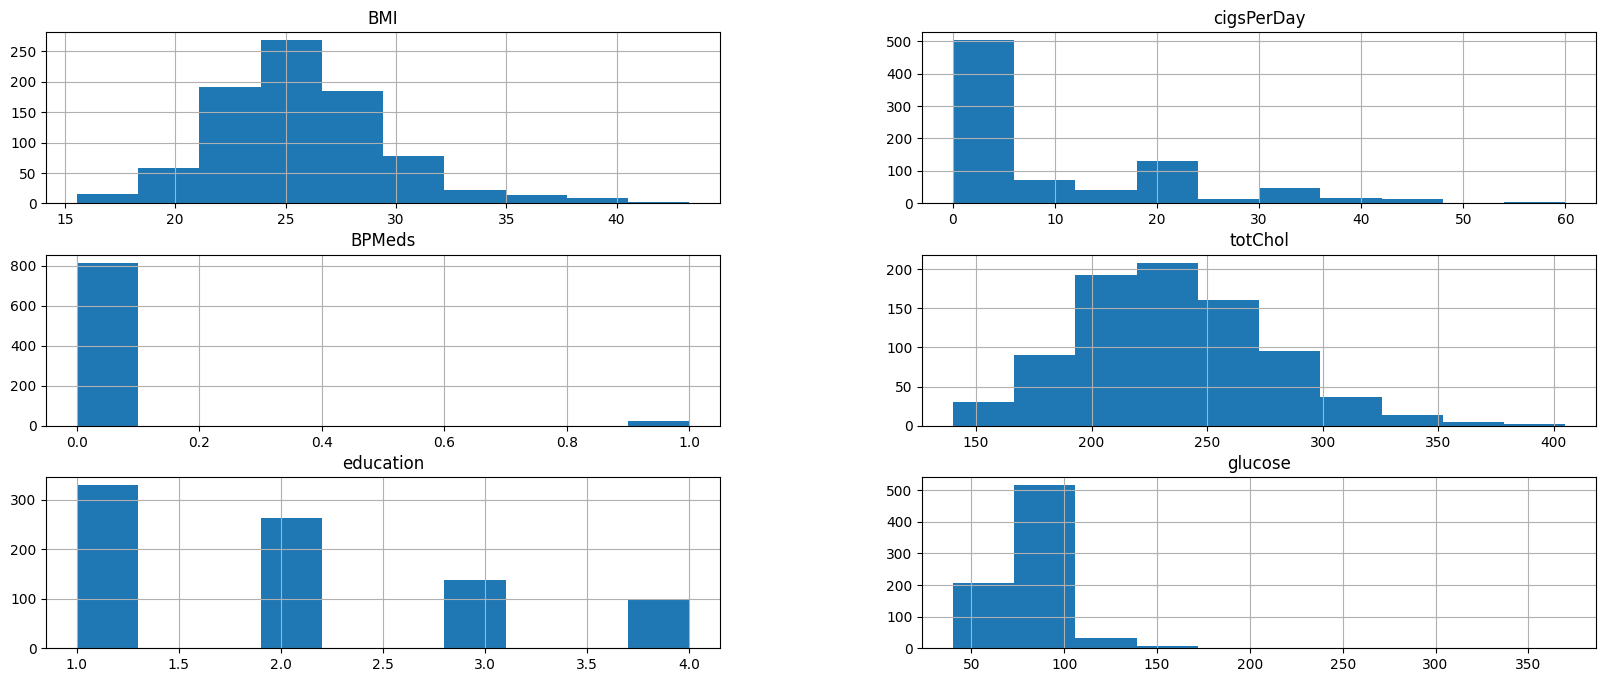

In [219]:
cols = cols_with_null_1.index
test_copy[cols].hist(figsize=(20, 8));

In [220]:
test_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848 entries, 0 to 847
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               848 non-null    int64  
 1   age              848 non-null    int64  
 2   education        830 non-null    float64
 3   sex              848 non-null    object 
 4   is_smoking       848 non-null    object 
 5   cigsPerDay       841 non-null    float64
 6   BPMeds           839 non-null    float64
 7   prevalentStroke  848 non-null    int64  
 8   prevalentHyp     848 non-null    int64  
 9   diabetes         848 non-null    int64  
 10  totChol          836 non-null    float64
 11  sysBP            848 non-null    float64
 12  diaBP            848 non-null    float64
 13  BMI              843 non-null    float64
 14  heartRate        848 non-null    float64
 15  glucose          764 non-null    float64
dtypes: float64(9), int64(5), object(2)
memory usage: 106.1+ KB


In [221]:
values_1 = {
    'glucose': test_copy['glucose'].median(),
    'totChol': test_copy['totChol'].median(),
    'BMI': test_copy['BMI'].mode(),
    'cigsPerDay': test_copy['cigsPerDay'].mode()[0],
    'education': train_copy['education'].mode()[0],
    'BPMeds': train_copy['BPMeds'].mode()[0]
}
test_copy = test_copy.fillna(values_1)
test_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848 entries, 0 to 847
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               848 non-null    int64  
 1   age              848 non-null    int64  
 2   education        848 non-null    float64
 3   sex              848 non-null    object 
 4   is_smoking       848 non-null    object 
 5   cigsPerDay       848 non-null    float64
 6   BPMeds           848 non-null    float64
 7   prevalentStroke  848 non-null    int64  
 8   prevalentHyp     848 non-null    int64  
 9   diabetes         848 non-null    int64  
 10  totChol          848 non-null    float64
 11  sysBP            848 non-null    float64
 12  diaBP            848 non-null    float64
 13  BMI              843 non-null    float64
 14  heartRate        848 non-null    float64
 15  glucose          848 non-null    float64
dtypes: float64(9), int64(5), object(2)
memory usage: 106.1+ KB


In [589]:
df_2 = pd.concat([train_copy, test], ignore_index=True)
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4237 entries, 0 to 4236
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               4237 non-null   int64  
 1   age              4237 non-null   int64  
 2   education        4219 non-null   float64
 3   sex              4237 non-null   object 
 4   is_smoking       4237 non-null   object 
 5   cigsPerDay       4230 non-null   float64
 6   BPMeds           4228 non-null   float64
 7   prevalentStroke  4237 non-null   int64  
 8   prevalentHyp     4237 non-null   int64  
 9   diabetes         4237 non-null   int64  
 10  totChol          4225 non-null   float64
 11  sysBP            4237 non-null   float64
 12  diaBP            4237 non-null   float64
 13  BMI              4232 non-null   float64
 14  heartRate        4237 non-null   float64
 15  glucose          4153 non-null   float64
 16  TenYearCHD       3389 non-null   float64
dtypes: float64(10)

In [590]:
df_2 = df_2.drop('TenYearCHD', axis=1)

In [591]:
df_2 = df_2.drop('id', axis=1)

C:\Users\rinen\AppData\Local\Temp\ipykernel_28328\1225346542.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<AxesSubplot: >

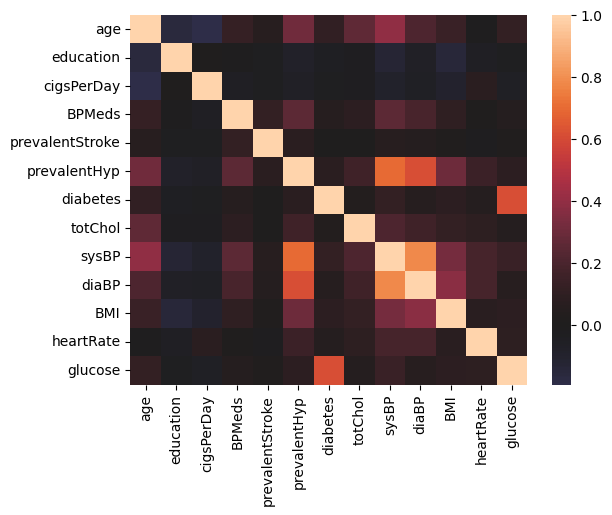

In [592]:

sns.heatmap(df_2.corr(),center=0)

array([[<AxesSubplot: title={'center': 'age'}>,
        <AxesSubplot: title={'center': 'education'}>,
        <AxesSubplot: title={'center': 'cigsPerDay'}>,
        <AxesSubplot: title={'center': 'BPMeds'}>],
       [<AxesSubplot: title={'center': 'prevalentStroke'}>,
        <AxesSubplot: title={'center': 'prevalentHyp'}>,
        <AxesSubplot: title={'center': 'diabetes'}>,
        <AxesSubplot: title={'center': 'totChol'}>],
       [<AxesSubplot: title={'center': 'sysBP'}>,
        <AxesSubplot: title={'center': 'diaBP'}>,
        <AxesSubplot: title={'center': 'BMI'}>,
        <AxesSubplot: title={'center': 'heartRate'}>],
       [<AxesSubplot: title={'center': 'glucose'}>, <AxesSubplot: >,
        <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

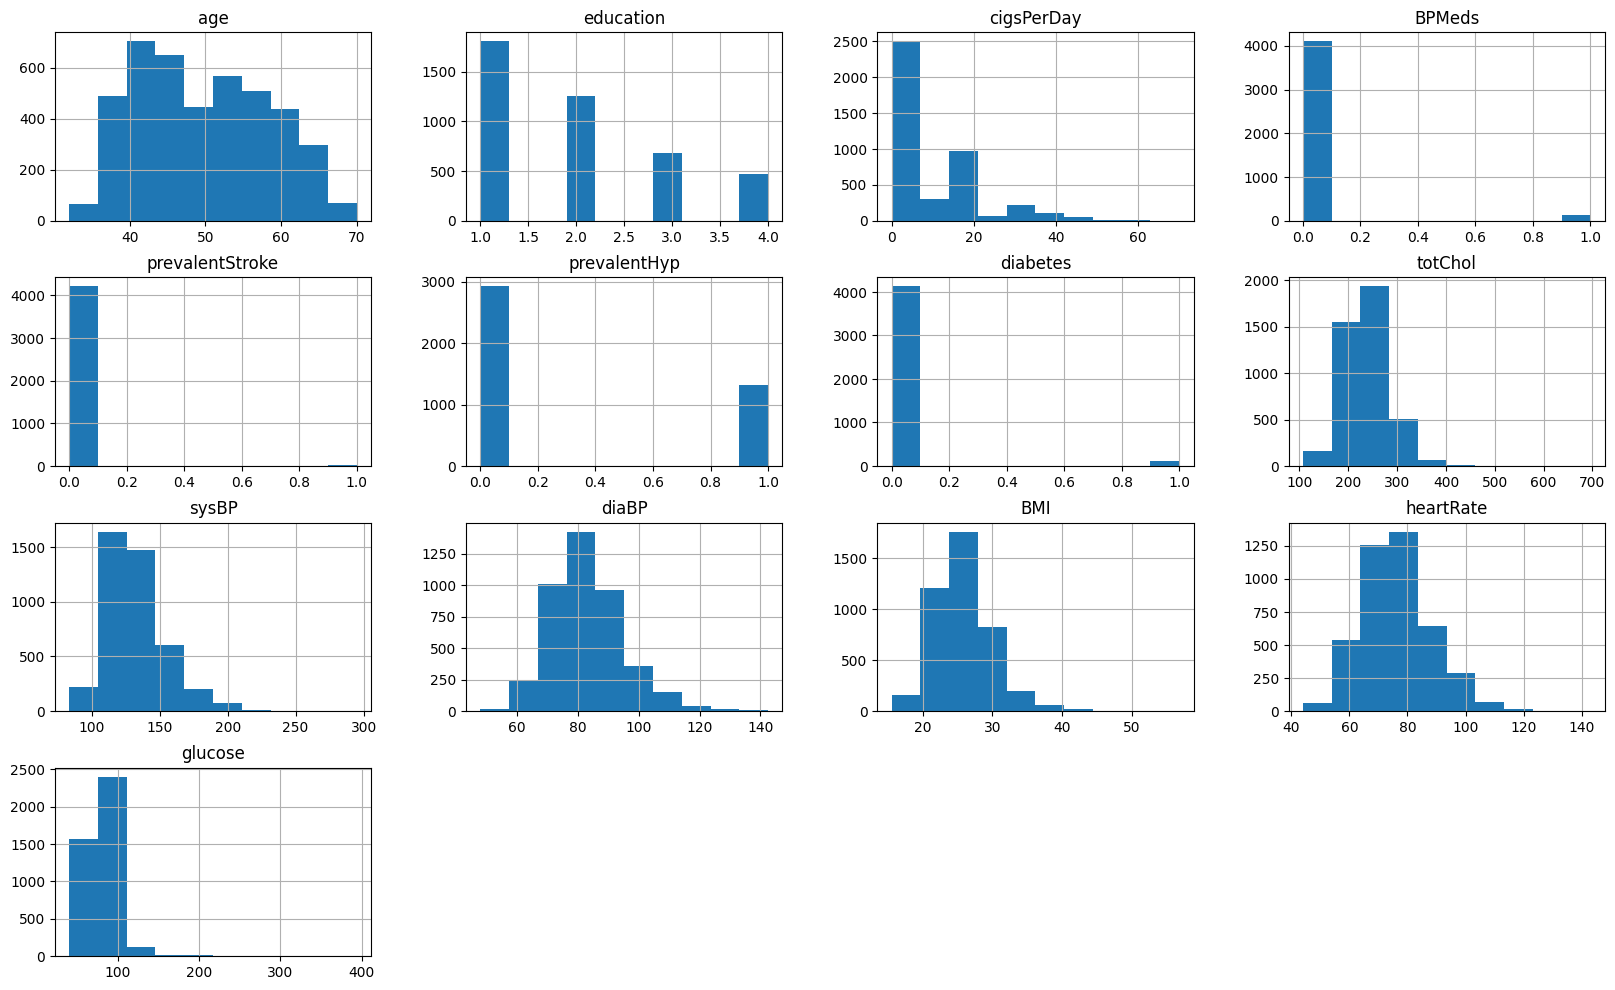

In [593]:

df_2[df_2.columns].hist(figsize=(20,12))

In [594]:
df_2['sysBP'] = df_2['sysBP'].apply(lambda x: 1.0 if x >=140 in df_2['sysBP'] else 0.0)

In [595]:
df_2 = df_2.drop('diaBP', axis=1)

In [596]:
df_2 = df_2.rename(columns={'sysBP':'HighBP'})

In [620]:

a = df_2['BMI']
def BMI_I(a):
    if a <30: a = 0
    if 40 <= a: a = 3
    if 40 > a >=35: a = 2
    if 35 > a >=30: a = 1
    return a

In [ ]:
df_2['BMI']=  df_2['BMI'].apply(BMI_I)

array([[<AxesSubplot: title={'center': 'age'}>,
        <AxesSubplot: title={'center': 'education'}>,
        <AxesSubplot: title={'center': 'cigsPerDay'}>],
       [<AxesSubplot: title={'center': 'BPMeds'}>,
        <AxesSubplot: title={'center': 'prevalentStroke'}>,
        <AxesSubplot: title={'center': 'prevalentHyp'}>],
       [<AxesSubplot: title={'center': 'diabetes'}>,
        <AxesSubplot: title={'center': 'totChol'}>,
        <AxesSubplot: title={'center': 'HighBP'}>],
       [<AxesSubplot: title={'center': 'BMI'}>,
        <AxesSubplot: title={'center': 'heartRate'}>,
        <AxesSubplot: title={'center': 'glucose'}>]], dtype=object)

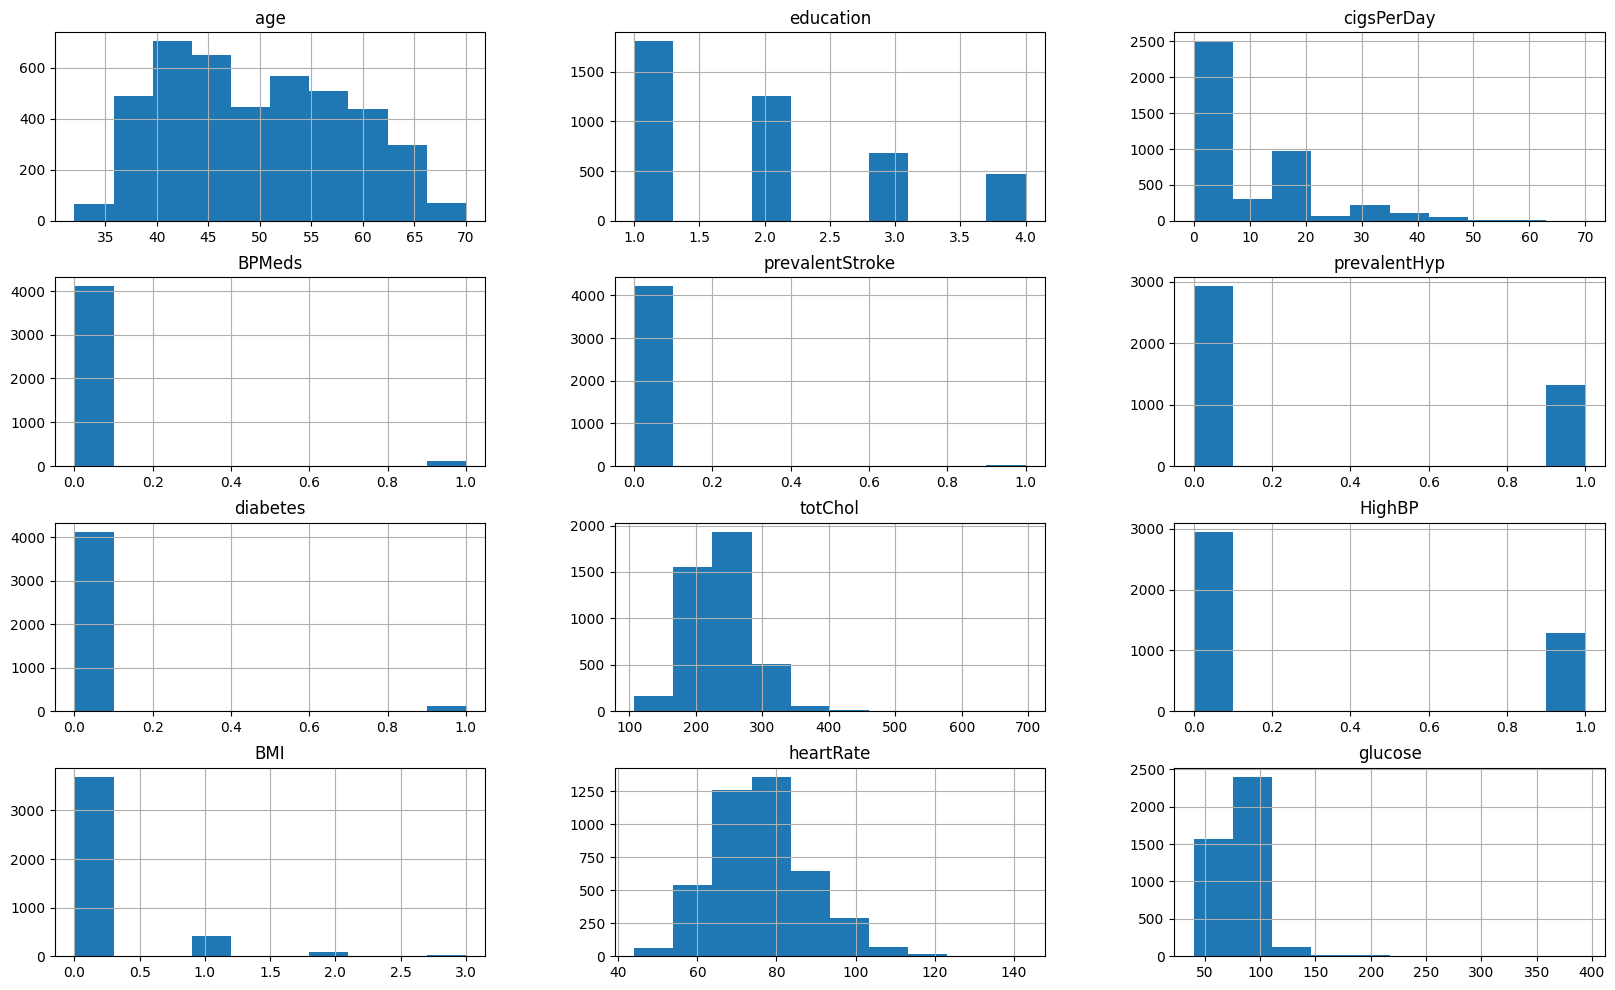

In [600]:
df_2[df_2.columns].hist(figsize=(20,12))

<AxesSubplot: xlabel='HighBP', ylabel='prevalentHyp'>

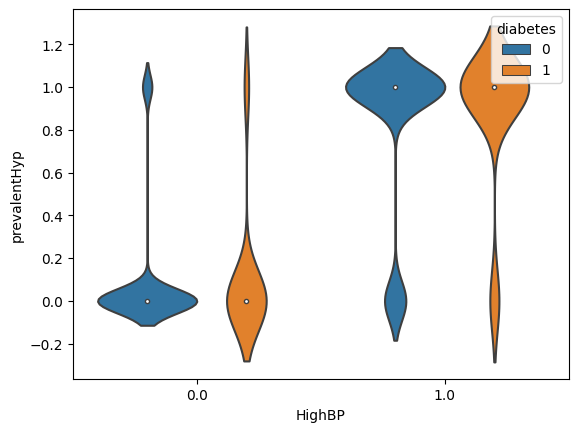

In [617]:
sns.violinplot(
    data=df_2,
    y='prevalentHyp',
    x='HighBP',
    hue='diabetes'
)

<AxesSubplot: xlabel='diabetes', ylabel='BMI'>

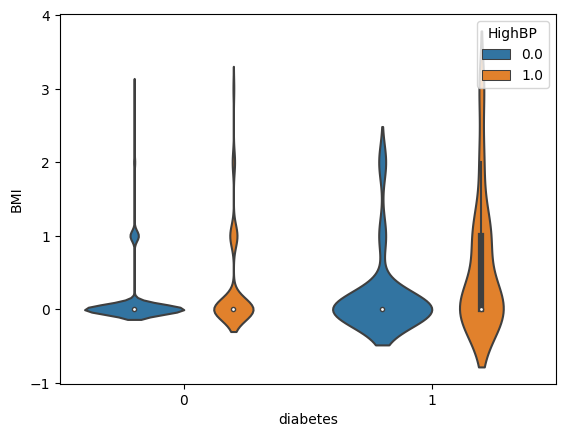

In [615]:
sns.violinplot(
    data=df_2,
    x='diabetes',
    y='BMI',
    hue='HighBP'
)

In [601]:
df_2

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,HighBP,BMI,heartRate,glucose
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,1.0,0.0,90.0,80.0
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,1.0,0.0,72.0,75.0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,0.0,0.0,88.0,94.0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,1.0,0.0,68.0,94.0
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,0.0,0.0,70.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4232,46,3.0,F,NO,0.0,0.0,0,0,0,277.0,0.0,0.0,63.0,77.0
4233,58,2.0,F,NO,0.0,0.0,0,0,0,190.0,0.0,0.0,65.0,70.0
4234,55,1.0,M,NO,0.0,0.0,0,0,0,199.0,0.0,0.0,120.0,NaN
4235,45,3.0,F,NO,0.0,0.0,0,1,0,231.0,1.0,0.0,75.0,92.0


                Всего 83 человека получают терапию гипотензивную.

In [363]:

diabetes = diabetes.rename(columns={'Glucose':'glucose', 'Outcome':'diabetes', 'Age':'age'})


In [628]:
df_3_1=pd.read_csv('data/diabetes_012_health_indicators_BRFSS2015.csv')
df_3_2=pd.read_csv('data/diabetes_binary_5050split_health_indicators_BRFSS2015.csv')
df_3_3=pd.read_csv('data/diabetes_binary_health_indicators_BRFSS2015.csv')

In [629]:
df_3_1 = df_3_1.rename(columns={'Diabetes_012':'Diabetes_binary'})

In [630]:
df_3 = pd.concat([df_3_1,df_3_2,df_3_3], ignore_index=True)
df_3.rename(columns={'Diabetes_binary':'diabetes', 'Age': 'age'}, inplace=True)
df_3

,diabetes,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578047,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
578048,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
578049,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
578050,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [631]:
df_3['BMI']=  df_3['BMI'].apply(BMI_I)

,diabetes,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,age,Education,Income
0,0.0,1.0,1.0,1.0,3,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578047,0.0,1.0,1.0,1.0,3,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
578048,1.0,1.0,1.0,1.0,0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
578049,0.0,0.0,0.0,1.0,0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
578050,0.0,1.0,0.0,1.0,0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


<AxesSubplot: >

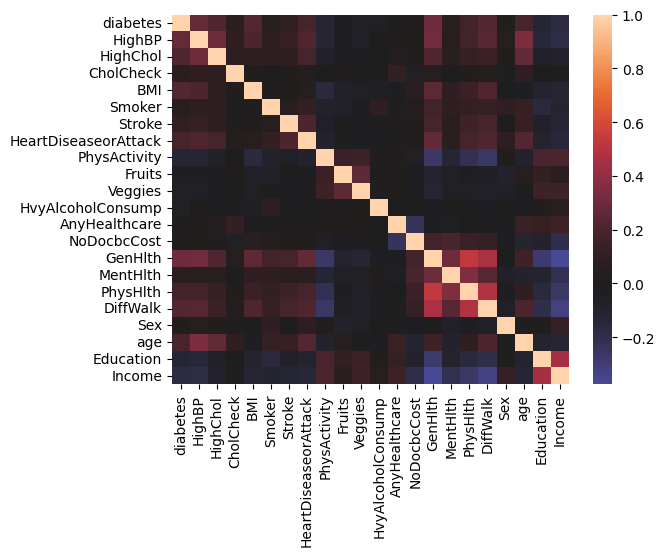

In [633]:
sns.heatmap(df_3.corr(),center=0)

array([[<AxesSubplot: title={'center': 'diabetes'}>,
        <AxesSubplot: title={'center': 'HighBP'}>,
        <AxesSubplot: title={'center': 'HighChol'}>,
        <AxesSubplot: title={'center': 'CholCheck'}>,
        <AxesSubplot: title={'center': 'BMI'}>],
       [<AxesSubplot: title={'center': 'Smoker'}>,
        <AxesSubplot: title={'center': 'Stroke'}>,
        <AxesSubplot: title={'center': 'HeartDiseaseorAttack'}>,
        <AxesSubplot: title={'center': 'PhysActivity'}>,
        <AxesSubplot: title={'center': 'Fruits'}>],
       [<AxesSubplot: title={'center': 'Veggies'}>,
        <AxesSubplot: title={'center': 'HvyAlcoholConsump'}>,
        <AxesSubplot: title={'center': 'AnyHealthcare'}>,
        <AxesSubplot: title={'center': 'NoDocbcCost'}>,
        <AxesSubplot: title={'center': 'GenHlth'}>],
       [<AxesSubplot: title={'center': 'MentHlth'}>,
        <AxesSubplot: title={'center': 'PhysHlth'}>,
        <AxesSubplot: title={'center': 'DiffWalk'}>,
        <AxesSubplot: ti

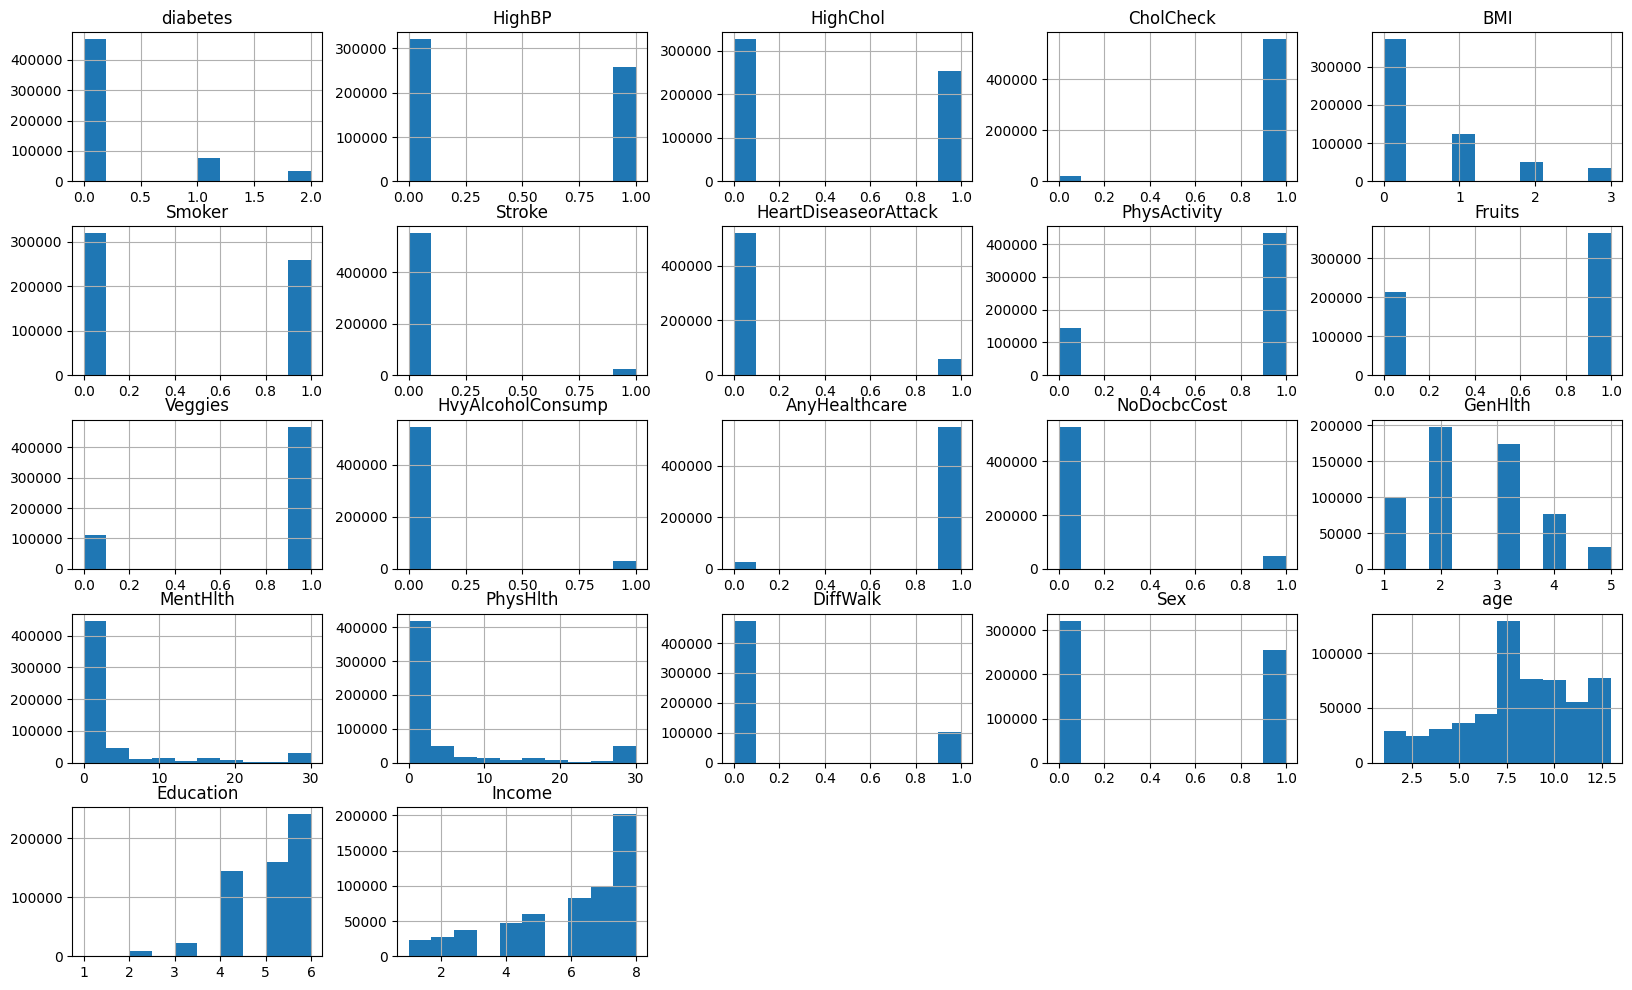

In [634]:
df_3[df_3.columns].hist(figsize=(20,12))